In [45]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
PATH = "Titanic-Dataset.csv"
data = pd.read_csv(PATH)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
column_names = data.columns
for column in column_names:
    print(column + ' - ' + str(data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [33]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
# Display basic information
print(data.info())

# Show the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5   

In [35]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64


In [36]:
# For numerical columns, you might fill with median or mean
data['Age'].fillna(data['Age'].median(), inplace=True)

# For categorical columns, you might fill with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

#Add new category FamilySize
data['FamilySize'] = data['SibSp']+ data['Parch'] + 1

In [40]:
# Convert 'Sex' column to numerical
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# Convert 'Embarked' column to numerical
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

Number of duplicate rows after removal: 0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


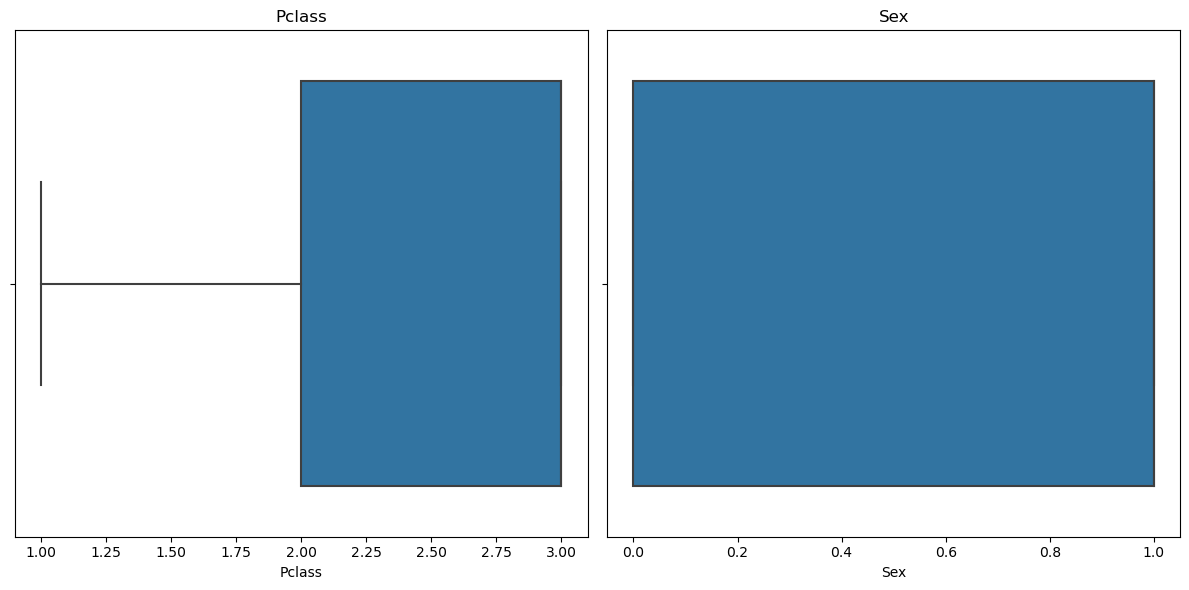

In [46]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Check for duplicates after removal
print("Number of duplicate rows after removal:", data_cleaned.duplicated().sum())

# Visualize numerical features after removing duplicates
plt.figure(figsize=(12, 6))
plt.title('Box Plots of Numerical Features After Removing Duplicates')
for i, col in enumerate(['Pclass', 'Sex']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Number of outliers: 86


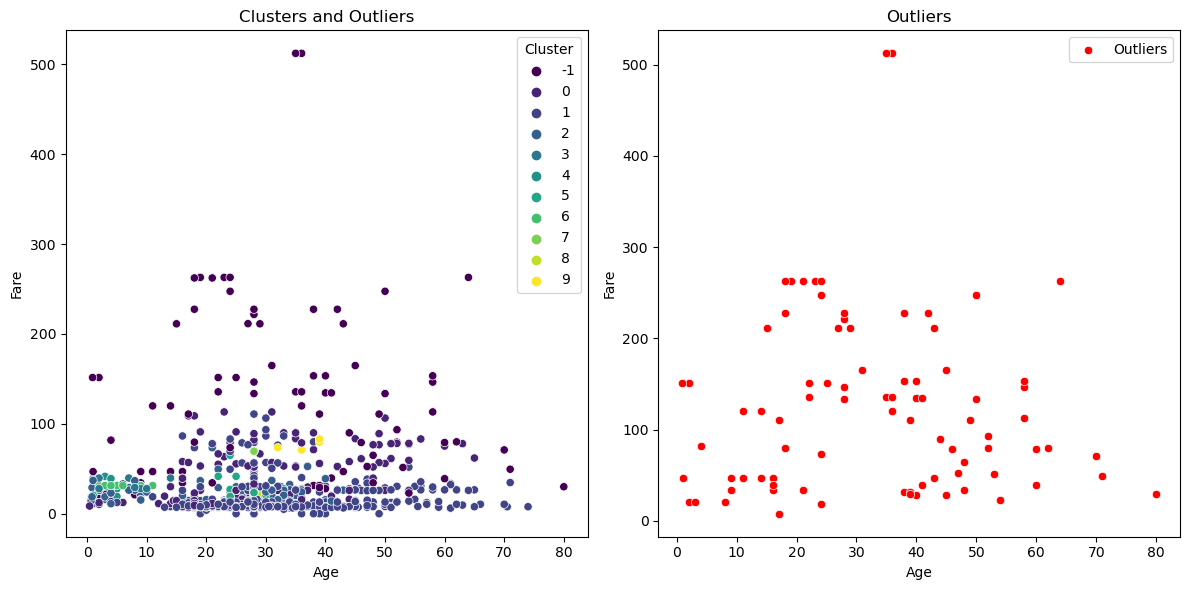

In [49]:
# Define features
features = ['Age', 'Fare', 'FamilySize']
X = data[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Identify outliers
outliers = data[data['Cluster'] == -1]

# Display number of outliers
print(f"Number of outliers: {len(outliers)}")

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Cluster', palette='viridis', data=data, legend='full')
plt.title('Clusters and Outliers')

# Plot outliers
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Fare', data=outliers, color='red', label='Outliers')
plt.title('Outliers')

plt.tight_layout()
plt.show()